<a href="https://colab.research.google.com/github/janavishah922/creditcard/blob/master/trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Clone the entire repo
!git clone -l -s https://github.com/janavishah922/creditcard.git janavi
%cd cloned-repo
!ls

Cloning into 'janavi'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
janavi	sample_data


In [0]:
import pandas as pd
path = "/content/janavi/Collection_Home3.xlsx"
df = pd.read_excel(path)
print(df)

In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [0]:
Collection_sample = df.sample(frac=0.1)

In [0]:
df.TARGET.value_counts()

Collection_sample.TARGET.value_counts()

In [0]:
#Target Variable Count in data and sample
df.TARGET.value_counts()/len(df)

Collection_sample.TARGET.value_counts()/len(Collection_sample)

In [0]:
# Data Description

Collection_sample.describe()

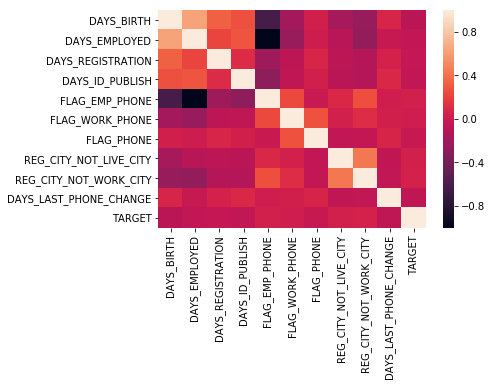

In [0]:
corr = Collection_sample.corr()

sns.heatmap(corr, 

        xticklabels=corr.columns,

        yticklabels=corr.columns)


In [0]:
from sklearn import preprocessing

from collections import defaultdict

d = defaultdict(preprocessing.LabelEncoder)
fit = Collection_sample.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))


NameError: ignored

In [0]:
#Convert the categorical columns based on encoding

for i in list(d.keys()):

    Collection_sample[i] = d[i].transform(Collection_sample[i].fillna('NA'))

    

    features = Collection_sample[Collection_sample.columns.difference(['TARGET'])]

labels = Collection_sample['TARGET']

features = features.fillna(0)


In [0]:
#WOE and IV



import pandas.core.algorithms as algos

from pandas import Series

import scipy.stats.stats as stats

import re

import traceback

import string



max_bin = 20

force_bin = 3

In [0]:
# define a binning function

def mono_bin(Y, X, n = max_bin):

    

    df1 = pd.DataFrame({"X": X, "Y": Y})

    justmiss = df1[['X','Y']][df1.X.isnull()]

    notmiss = df1[['X','Y']][df1.X.notnull()]

    r = 0

    while np.abs(r) < 1:

        try:

            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})

            d2 = d1.groupby('Bucket', as_index=True)

            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)

            n = n - 1 

        except Exception as e:

            n = n - 1



    if len(d2) == 1:

        n = force_bin         

        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))

        if len(np.unique(bins)) == 2:

            bins = np.insert(bins, 0, 1)

            bins[1] = bins[1]-(bins[1]/2)

        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 

        d2 = d1.groupby('Bucket', as_index=True)

    

    d3 = pd.DataFrame({},index=[])

    d3["MIN_VALUE"] = d2.min().X

    d3["MAX_VALUE"] = d2.max().X

    d3["COUNT"] = d2.count().Y

    d3["EVENT"] = d2.sum().Y

    d3["NONEVENT"] = d2.count().Y - d2.sum().Y

    d3=d3.reset_index(drop=True)

    

    if len(justmiss.index) > 0:

        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])

        d4["MAX_VALUE"] = np.nan

        d4["COUNT"] = justmiss.count().Y

        d4["EVENT"] = justmiss.sum().Y

        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y

        d3 = d3.append(d4,ignore_index=True)

    

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT

    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT

    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT

    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT

    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)

    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)

    d3["VAR_NAME"] = "VAR"

    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       

    d3 = d3.replace([np.inf, -np.inf], 0)

    d3.IV = d3.IV.sum()

    

    return(d3)


In [0]:
def char_bin(Y, X):

        

    df1 = pd.DataFrame({"X": X, "Y": Y})

    justmiss = df1[['X','Y']][df1.X.isnull()]

    notmiss = df1[['X','Y']][df1.X.notnull()]    

    df2 = notmiss.groupby('X',as_index=True)

    

    d3 = pd.DataFrame({},index=[])

    d3["COUNT"] = df2.count().Y

    d3["MIN_VALUE"] = df2.sum().Y.index

    d3["MAX_VALUE"] = d3["MIN_VALUE"]

    d3["EVENT"] = df2.sum().Y

    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    

    if len(justmiss.index) > 0:

        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])

        d4["MAX_VALUE"] = np.nan

        d4["COUNT"] = justmiss.count().Y

        d4["EVENT"] = justmiss.sum().Y

        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y

        d3 = d3.append(d4,ignore_index=True)

    

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT

    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT

    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT

    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT

    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)

    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)

    d3["VAR_NAME"] = "VAR"

    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      

    d3 = d3.replace([np.inf, -np.inf], 0)

    d3.IV = d3.IV.sum()

    d3 = d3.reset_index(drop=True)

    

    return(d3)

In [0]:
def data_vars(df1, target):

    

    stack = traceback.extract_stack()

    filename, lineno, function_name, code = stack[-2]

    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]

    final = (re.findall(r"[\w']+", vars_name))[-1]

    

    x = df1.dtypes.index

    count = -1

    

    for i in x:

        if i.upper() not in (final.upper()):

            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:

                conv = mono_bin(target, df1[i])

                conv["VAR_NAME"] = i

                count = count + 1

            else:

                conv = char_bin(target, df1[i])

                conv["VAR_NAME"] = i            

                count = count + 1

                

            if count == 0:

                iv_df = conv

            else:

                iv_df = iv_df.append(conv,ignore_index=True)

    

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})

    iv = iv.reset_index()

    return(iv_df,iv)

In [0]:
final_iv, IV = data_vars(Collection_sample[Collection_sample.columns.difference(['TARGET'])],Collection_sample.TARGET)

IV = IV.rename(columns={'VAR_NAME':'index'})

IV.sort_values(['IV'],ascending=0)

In [0]:
#Missing Data

# Function to calculate missing values by column# Funct 

def missing_values_table(Collection_sample):

        # Total missing values

        mis_val = Collection_sample.isnull().sum()

        

        # Percentage of missing values

        mis_val_percent = 100 * Collection_sample.isnull().sum() / len(Collection_sample)

        

        # Make a table with the results

        mis_val_table = pd.concat([mis_val , mis_val_percent], axis=1)

        

        # Rename the columns

        mis_val_table_ren_columns = mis_val_table.rename(

        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        

        # Sort the table by percentage of missing descending

        mis_val_table_ren_columns = mis_val_table_ren_columns[

            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(

        '% of Total Values', ascending=False).round(1)

        

        # Print some summary information

        print ("Your selected dataframe has " + str(Collection_sample.shape[1]) + " columns.\n"      

            "There are " + str(mis_val_table_ren_columns.shape[0]) +

              " columns that have missing values.")

        

        # Return the dataframe with missing information

        return mis_val_table_ren_columns


In [0]:
# Missing values statistics
missing_values = missing_values_table(Collection_sample)

missing_values.head(20)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [0]:
# Imputation of missing values



from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = 'NaN',strategy ='mean',axis=0)



imputer = Imputer.fit(Collection_sample[: ,15 : 16])

Collection_sample[:,15 : 16] = imputer.transform(Collection_sample[:,15 : 16])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: ignored

In [0]:

#Variable Importance using RF

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(preds,labels)

print(accuracy)

In [0]:
from pandas import DataFrame

VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

VI = VI.reset_index()

VI.sort_values(['RF'],ascending=0)


In [0]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):

    vif = pd.DataFrame()

    vif["Features"] = features.columns

    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    

    return(vif)

In [0]:
vif = calculate_vif(features)

while vif['VIF'][vif['VIF'] > 10].any():

    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]

    features.drop(remove,axis=1,inplace=True)

    vif = calculate_vif(features)



list(vif['Features'])

In [0]:
final_vars = list(vif['Features']) + ['TARGET']

df1 = df[final_vars].fillna(0)

df1.describe()

In [0]:
#RandomForest
from sklearn.cross_validation import train_test_split



ModuleNotFoundError: ignored

In [0]:
#RandomForest
from sklearn.model_selection import train_test_split



In [0]:

train, test = train_test_split(Collection_sample, test_size = 0.4)

train = train.reset_index(drop=True)

test = test.reset_index(drop=True)

features_train = train[list(vif["Features"])]

label_train = train['TARGET']

features_test = test[list(vif["Features"])]

label_test = test['TARGET']


In [0]:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)

pred_test = clf.predict(features_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(pred_train,label_train)

accuracy_test = accuracy_score(pred_test,label_test)

In [0]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])

auc_train = metrics.auc(fpr,tpr)

In [0]:
fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])

auc_test = metrics.auc(fpr,tpr)



In [0]:

print(accuracy_train,accuracy_test,auc_train,auc_test)

pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])

In [0]:

#GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)

pred_test = clf.predict(features_test)

In [0]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(pred_train,label_train)

accuracy_test = accuracy_score(pred_test,label_test)


In [0]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])

auc_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])

auc_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,auc_train,auc_test)

pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])


In [0]:
#Deciles and KS Statistics

from collections import OrderedDict

import pandas as pd

import sys

%matplotlib inline


In [0]:
def plot_pandas_style(styler):

    from IPython.core.display import HTML

    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])

    return HTML(html)

In [0]:
def highlight_max(s,color='yellow'):

    '''

    highlight the maximum in a Series yellow.

    '''

    is_max = s == s.max()

    return ['background-color: {}'.format(color) if v else '' for v in is_max]



In [0]:
def decile_labels(agg1,label,color='skyblue'):

    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('TARGET',0),('NONTARGET',0),('PCT_TAR',0),('CUM_TAR',0),('CUM_NONTAR',0),('DIST_TAR',0),('DIST_NONTAR',0),('SPREAD',0))),index=[0])

    agg1 = agg1.append(agg_dummy).sort_index()

    agg1.index.name = label

    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])

    agg1.bar(subset=['TARGET'], color='{}'.format(color))

    agg1.bar(subset=['TOTAL'], color='{}'.format(color))

    agg1.bar(subset=['PCT_TAR'], color='{}'.format(color))

    return(agg1)

    

In [0]:
def deciling(data,decile_by,target,nontarget):

    inputs = list(decile_by)

    inputs.extend((target,nontarget))

    decile = data[inputs]

    grouped = decile.groupby(decile_by)

    agg1 = pd.DataFrame({},index=[])

    agg1['TOTAL'] = grouped.sum()[nontarget] + grouped.sum()[target]

    agg1['TARGET'] = grouped.sum()[target]

    agg1['NONTARGET'] = grouped.sum()[nontarget]

    agg1['PCT_TAR'] = grouped.mean()[target]*100

    agg1['CUM_TAR'] = grouped.sum()[target].cumsum()

    agg1['CUM_NONTAR'] = grouped.sum()[nontarget].cumsum()

    agg1['DIST_TAR'] = agg1['CUM_TAR']/agg1['TARGET'].sum()*100

    agg1['DIST_NONTAR'] = agg1['CUM_NONTAR']/agg1['NONTARGET'].sum()*100

    agg1['SPREAD'] = (agg1['DIST_TAR'] - agg1['DIST_NONTAR'])

    agg1 = decile_labels(agg1,'DECILE',color='skyblue')

    return(plot_pandas_style(agg1))


In [0]:
def scoring (features,clf,target): 

        score=pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])

        score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))

        score['DECILE'] = score['DECILE'].astype(float)

        score['TARGET'] = target

        score['NONTARGET'] = 1 - target

        return(score)

    
scores_train = scoring(features_train,clf,label_train)

scores_test = scoring(features_test,clf,label_test)



deciling(scores_train,['DECILE'],'TARGET','NONTARGET')

deciling(scores_test,['DECILE'],'TARGET','NONTARGET')


In [0]:
from collections import OrderedDict

import pandas as pd

import matplotlib.pyplot as plt



def plots(agg1,target,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)

    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')

    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')

    plt.xticks(range(10,110,10))

    plt.legend(fontsize=15)

    plt.grid(True)

    plt.title('Actual vs Predicted', fontsize=20)

    plt.xlabel("Population %",fontsize=15)

    plt.ylabel(str(target) + " " + str(type) + " %",fontsize=15)



    plt.subplot(132)

    X = agg1['DECILE'].tolist()

    X.append(0)

    Y = agg1['DIST_TAR'].tolist()

    Y.append(0)

    plt.plot(sorted(X),sorted(Y))

    plt.plot([0, 100], [0, 100],'r--')

    plt.xticks(range(0,110,10))

    plt.yticks(range(0,110,10))

    plt.grid(True)

    plt.title('Gains Chart', fontsize=20)

    plt.xlabel("Population %",fontsize=15)

    plt.ylabel(str(target) + str(" DISTRIBUTION") + " %",fontsize=15)

    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_TAR.item(),2),xy=[30,30], 

            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_TAR.item() + 5),fontsize = 13)

    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_TAR.item(),2),xy=[50,50], 

            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_TAR.item() + 5),fontsize = 13)



    plt.subplot(133)

    plt.plot(agg1['DECILE'],agg1['LIFT'])

    plt.xticks(range(10,110,10))

    plt.grid(True)

    plt.title('Lift Chart', fontsize=20)

    plt.xlabel("Population %",fontsize=15)

    plt.ylabel("Lift",fontsize=15)



    plt.tight_layout()


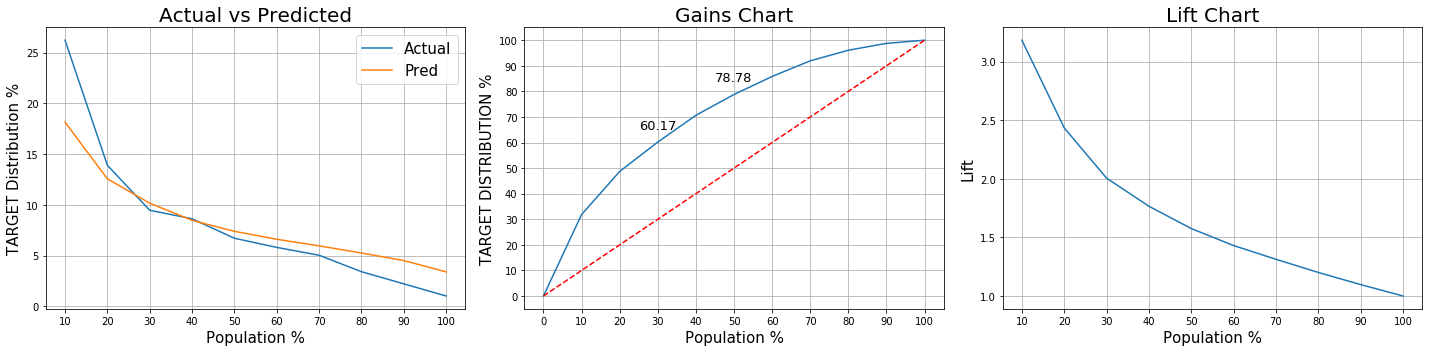

In [0]:
def gains(data,decile_by,target,score):

    inputs = list(decile_by)

    inputs.extend((target,score))

    decile = data[inputs]

    grouped = decile.groupby(decile_by)

    agg1 = pd.DataFrame({},index=[])

    agg1['ACTUAL'] = grouped.mean()[target]*100

    agg1['PRED'] = grouped.mean()[score]*100

    agg1['DIST_TAR'] = grouped.sum()[target].cumsum()/grouped.sum()[target].sum()*100

    agg1.index.name = 'DECILE'

    agg1 = agg1.reset_index()

    agg1['DECILE'] = agg1['DECILE']*10

    agg1['LIFT'] = agg1['DIST_TAR']/agg1['DECILE']

    plots(agg1,target,'Distribution')

    

lift_train = pd.concat([features_train,scores_train],axis=1)

lift_test = pd.concat([features_test,scores_test],axis=1)



gains(lift_train,['DECILE'],'TARGET','SCORE')
